In [1]:
import torch
import torchvision
import torchvision.transforms.v2 as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

'''
In this file you will write end-to-end code to train a neural network to categorize fashion-mnist data
'''
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

'''
PART 1:
Preprocess the fashion mnist dataset and determine a good batch size for the dataset.
Anything that works is accepted.
'''

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
    ])  # Use transforms to convert images to tensors and normalize them
batch_size = 64

c:\Python312\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [2]:
'''
PART 2:
Load the dataset. Make sure to utilize the transform and batch_size you wrote in the last section.
'''

trainset = torchvision.datasets.FashionMNIST(root='dataset', download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='dataset', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [3]:
'''
PART 3:
Design a multi layer perceptron. Since this is a purely Feedforward network, you mustn't use any convolutional layers
Do not directly import or copy any existing models.
'''

# Report split sizes
print('Training set has {} instances'.format(len(trainset)))
print('Validation set has {} instances'.format(len(testset)))

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #refer to the documentation to see how to use the layers: https://medium.com/@aaysbt/fashion-mnist-data-training-using-pytorch-7f6ad71e96f4
        self.fc1 = nn.Linear(784, 392)
        self.fc2 = nn.Linear(392, 146)
        self.fc3 = nn.Linear(146, 73)
        self.fc4 = nn.Linear(73, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        #sigmoid output layer
        x = torch.sigmoid(self.fc4(x))
        return x
        
net = Net().to(device)

Training set has 60000 instances
Validation set has 10000 instances


In [4]:
'''
PART 4:
Choose a good loss function and optimizer
'''

criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [5]:
'''
PART 5:
Train your model!
'''

num_epochs = 50
losses = []
'''Choose the number of epochs '''

for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(trainloader)
    losses.append(epoch_loss)
    print(f"Epoch {epoch+1}, Training loss: {running_loss / len(trainloader)}")

print('Finished Training')

Epoch 1, Training loss: 1.8534079432995842
Epoch 2, Training loss: 1.714747987703474
Epoch 3, Training loss: 1.6944739751215936
Epoch 4, Training loss: 1.6790945930267447
Epoch 5, Training loss: 1.6548671459338304
Epoch 6, Training loss: 1.6406030504942448
Epoch 7, Training loss: 1.63261295966248
Epoch 8, Training loss: 1.6279723368473906
Epoch 9, Training loss: 1.624399876543708
Epoch 10, Training loss: 1.6201283084049916
Epoch 11, Training loss: 1.6163209367916782
Epoch 12, Training loss: 1.6029147801877084
Epoch 13, Training loss: 1.591135740534329
Epoch 14, Training loss: 1.5830637771946026
Epoch 15, Training loss: 1.5706672845110456
Epoch 16, Training loss: 1.5666731371045874
Epoch 17, Training loss: 1.562922888981508
Epoch 18, Training loss: 1.559826397057027
Epoch 19, Training loss: 1.5568085944474632
Epoch 20, Training loss: 1.5548256181958895
Epoch 21, Training loss: 1.5516331272084576
Epoch 22, Training loss: 1.5500987571185585
Epoch 23, Training loss: 1.5493124859419458
Epoc

In [6]:
'''
PART 6:
Evalute your model! Accuracy should be greater or equal to 80%

'''
net.eval()

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy: ', correct/total)

Accuracy:  0.8764


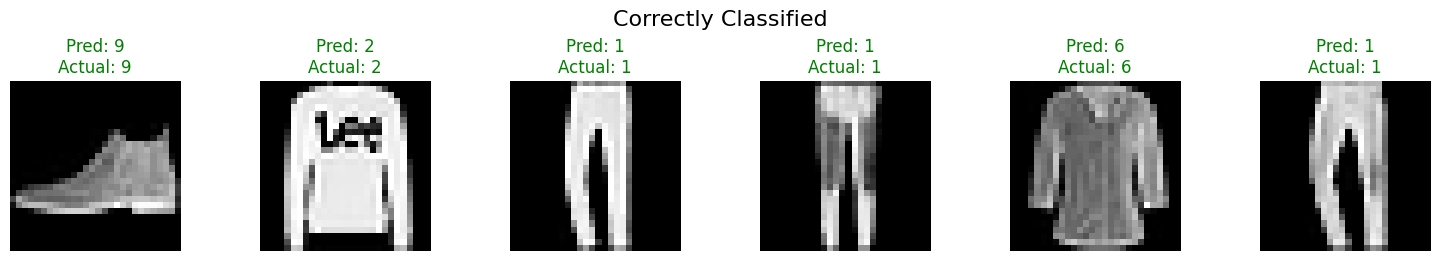

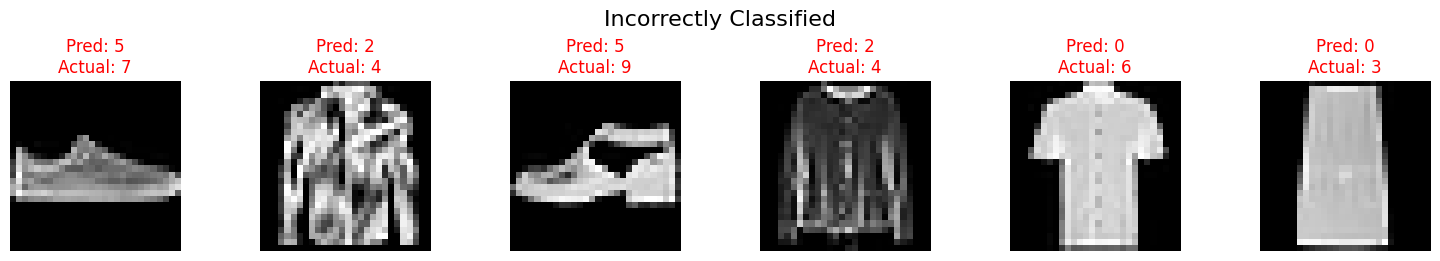

In [7]:
#get images for visualization

correct_images = []
correct_preds = []
correct_actuals = []

incorrect_images = []
incorrect_preds = []
incorrect_actuals = []


with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        for image, label, pred in zip(images, labels, predicted):
            if len(correct_images) < 6 and pred == label:
                correct_images.append(image)
                correct_preds.append(pred)
                correct_actuals.append(label)
            elif len(incorrect_images) < 6 and pred != label:
                incorrect_images.append(image)
                incorrect_preds.append(pred)
                incorrect_actuals.append(label)
            if len(correct_images) >= 6 and len(incorrect_images) >= 6:
                break
        if len(correct_images) >= 6 and len(incorrect_images) >= 6:
            break
        
#plot the images        
def plot_images(images, preds, actuals, title):
    fig, axs = plt.subplots(1, 6, figsize=(15, 2.5), constrained_layout=True)
    fig.suptitle(title, fontsize=16)
    for ax, image, pred, actual in zip(axs, images, preds, actuals):
        ax.imshow(image.cpu().numpy().transpose((1, 2, 0)).squeeze(), cmap='gray')
        if pred == actual:
            ax.set_title(f'Pred: {pred.item()}\nActual: {actual.item()}', color='green')
        else:
            ax.set_title(f'Pred: {pred.item()}\nActual: {actual.item()}', color='red')
        ax.axis('off')
        

plot_images(correct_images, correct_preds, correct_actuals, 'Correctly Classified')

plot_images(incorrect_images, incorrect_preds, incorrect_actuals, 'Incorrectly Classified')

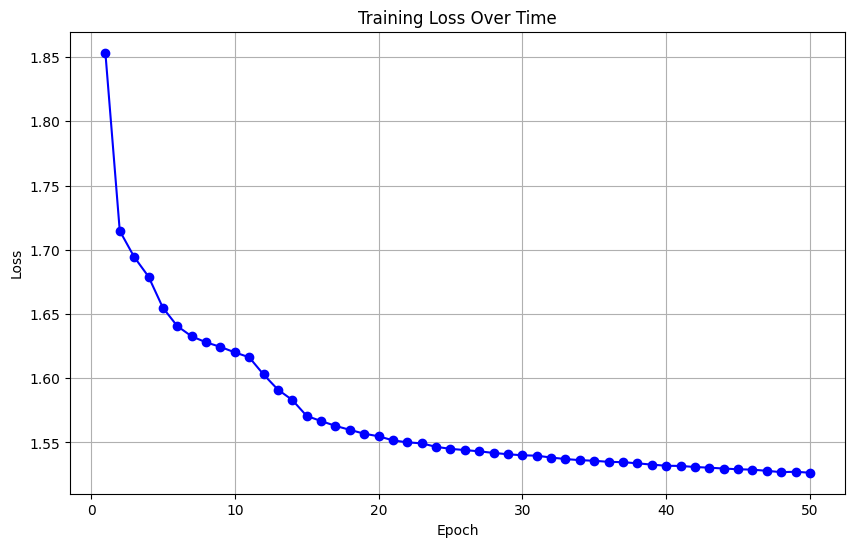

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), losses, marker='o', linestyle='-', color='blue')
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()